# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/onecall?lat={{lat}}&lon={{lng}}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp_kelvin = response['main']['temp_max']
        city_max_temp_celsius = city_max_temp_kelvin - 273.15
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp_celsius,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | as sanad
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | kapa'a
Processing Record 5 of Set 1 | tromso
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 16 of Set 1 | shevchenko
Processing Record 17 of Set 1 | jayapura
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,19.14,82,40,5.38,PT,1717110146
1,as sanad,34.4628,9.2640,24.14,51,0,2.17,TN,1717110146
2,edinburgh of the seven seas,-37.0676,-12.3116,12.00,55,64,3.82,SH,1717110146
3,kapa'a,22.0752,-159.3190,26.77,71,74,3.13,US,1717110146
4,tromso,69.6496,18.9570,12.01,71,0,0.00,NO,1717110146


In [6]:
import os

# Create the output directory if it does not exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,19.14,82,40,5.38,PT,1717110146
1,as sanad,34.4628,9.2640,24.14,51,0,2.17,TN,1717110146
2,edinburgh of the seven seas,-37.0676,-12.3116,12.00,55,64,3.82,SH,1717110146
3,kapa'a,22.0752,-159.3190,26.77,71,74,3.13,US,1717110146
4,tromso,69.6496,18.9570,12.01,71,0,0.00,NO,1717110146


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

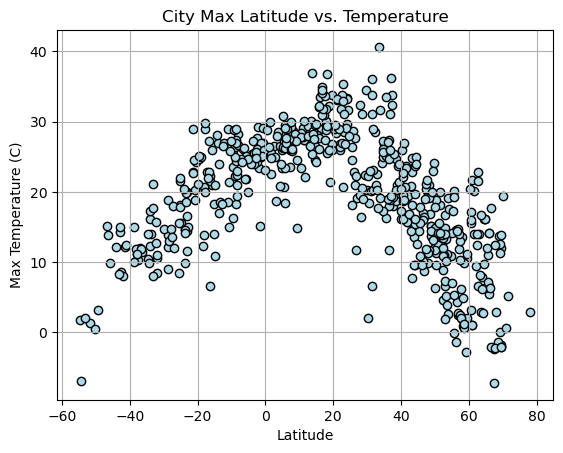

In [9]:
# Build scatter plot for latitude vs. temperature
latitude_data = [city['Lat'] for city in city_data]
temperature_data = [city['Max Temp'] for city in city_data]

# YOUR CODE HERE
plt.scatter(latitude_data, temperature_data, color='lightblue', edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

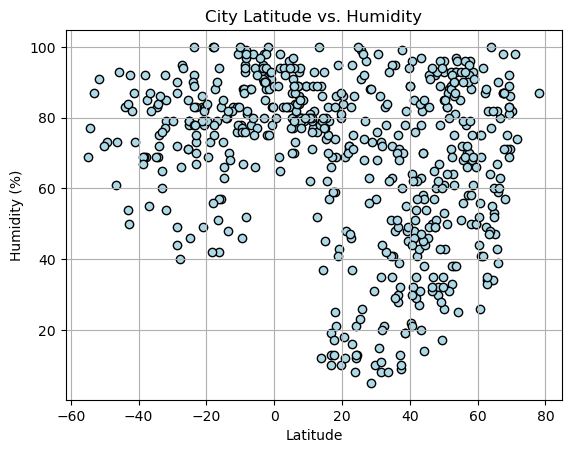

In [10]:
# Build the scatter plots for latitude vs. humidity
latitude_data = [city['Lat'] for city in city_data]
humidity_data = [city["Humidity"] for city in city_data]

# YOUR CODE HERE
plt.scatter(latitude_data, humidity_data, color='lightblue', edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

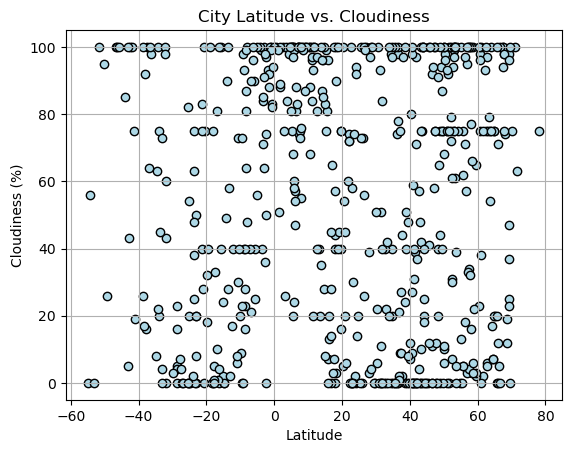

In [11]:
# Build the scatter plots for latitude vs. cloudiness
latitude_data = [city['Lat'] for city in city_data]
cloud_data = [city["Cloudiness"] for city in city_data]

# YOUR CODE HERE
plt.scatter(latitude_data, cloud_data, color='lightblue', edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

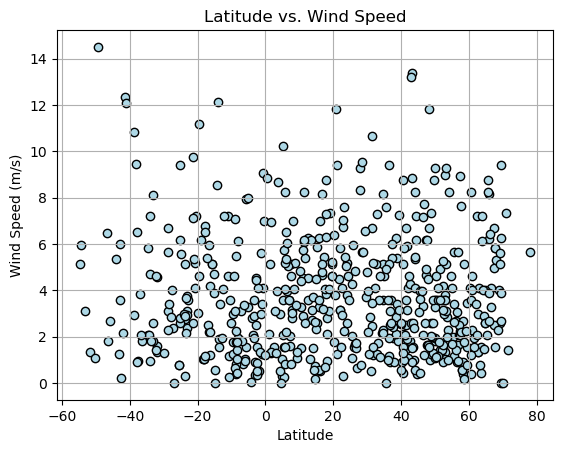

In [12]:
# Build the scatter plots for latitude vs. wind speed
latitude_data = [city['Lat'] for city in city_data]
wind_data = [city['Wind Speed'] for city in city_data]

# YOUR CODE HERE
plt.scatter(latitude_data, wind_data, color='lightblue', edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create scatter plot
    plt.scatter(x_values, y_values, color='skyblue', label='Data Points')

    # Add linear regression line
    plt.plot(x_values, slope * x_values + intercept, color='firebrick', label='Linear Regression')

    # Display equation
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
                 xy=(x_values.min(), y_values.max()),
                 xytext=(20, -20),
                 textcoords='offset points',
                 color='firebrick',
                 fontsize=16,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.7))

    # Display r-squared value
    print(f"The r-squared is: {r_value**2}")

    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,19.14,82,40,5.38,PT,1717110146
1,as sanad,34.4628,9.2640,24.14,51,0,2.17,TN,1717110146
3,kapa'a,22.0752,-159.3190,26.77,71,74,3.13,US,1717110146
4,tromso,69.6496,18.9570,12.01,71,0,0.00,NO,1717110146
6,longyearbyen,78.2186,15.6401,2.91,87,75,5.66,SJ,1717109897


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,12.00,55,64,3.82,SH,1717110146
5,chonchi,-42.6128,-73.8092,8.56,92,100,0.23,CL,1717110146
7,grytviken,-54.2811,-36.5092,-6.89,77,56,5.94,GS,1717110147
8,puerto natales,-51.7236,-72.4875,1.28,91,100,1.35,CL,1717110140
9,port-aux-francais,-49.3500,70.2167,3.22,73,26,14.51,TF,1717110147


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5987318726029108


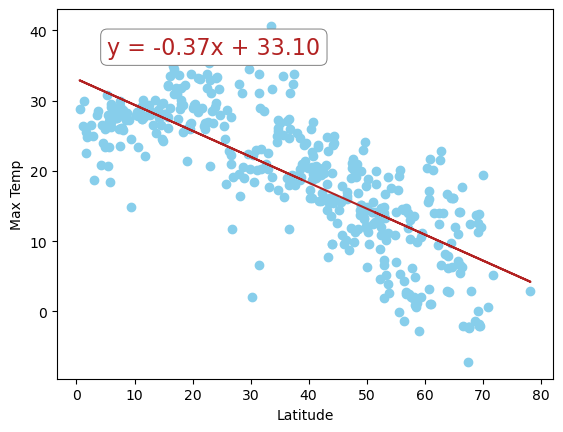

In [47]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], plt.xlabel('Latitude'), plt.ylabel('Max Temp'))

The r-squared is: 0.6631012150367005


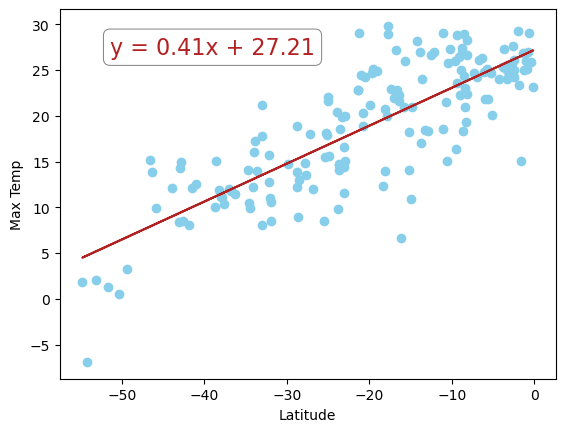

In [50]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], plt.xlabel('Latitude'), plt.ylabel('Max Temp'))

**Discussion about the linear relationship:** Moderate correlation between max temperature and latitude: temperature is highest near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0055006709323139925


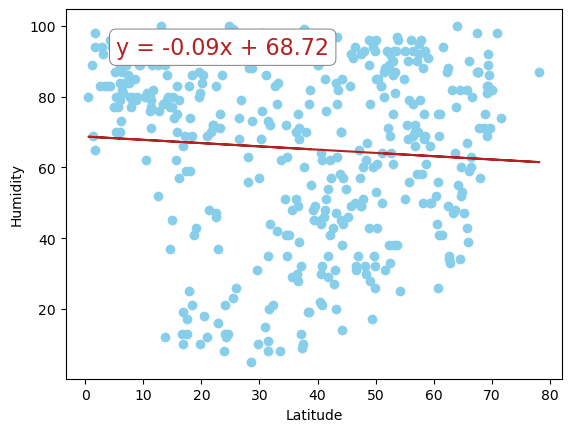

In [51]:
# Northern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], plt.xlabel('Latitude'), plt.ylabel('Humidity'))

The r-squared is: 0.07735264840421525


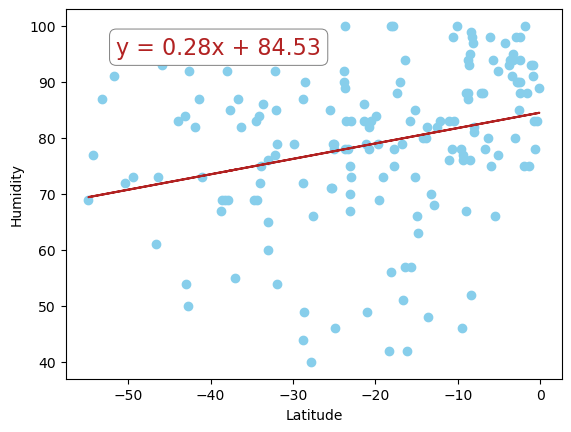

In [52]:
# Southern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], plt.xlabel('Latitude'), plt.ylabel('Humidity'))

**Discussion about the linear relationship:** Both hemispheres have very weak correlations: humidity decreases the further north you go from the equator, and it decreases the further south you go from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.020012100411911014


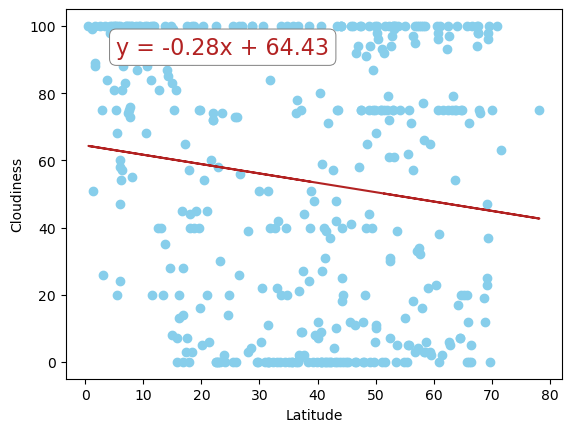

In [53]:
# Northern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], plt.xlabel('Latitude'), plt.ylabel('Cloudiness'))

The r-squared is: 0.017390174482328036


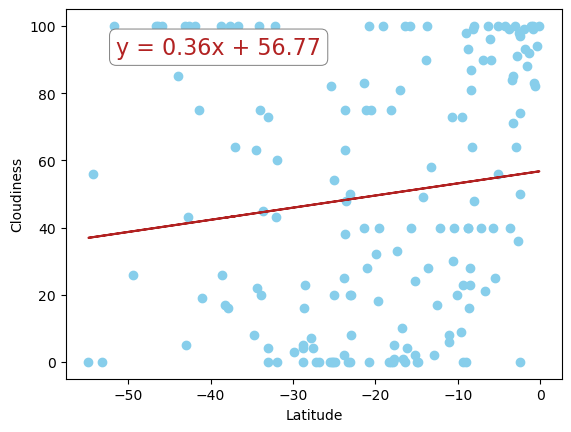

In [54]:
# Southern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], plt.xlabel('Latitude'), plt.ylabel('Cloudiness'))

**Discussion about the linear relationship:** Both hemispheres have a weak correlation between cloudiness and latitude and not much changes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0019113139851126143


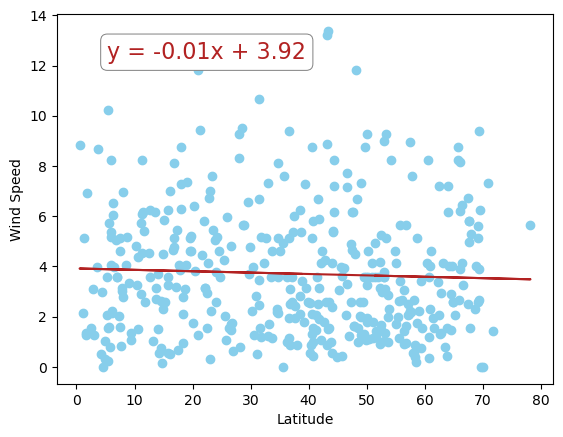

In [56]:
# Northern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], plt.xlabel('Latitude'), plt.ylabel('Wind Speed'))

The r-squared is: 0.03931975651789488


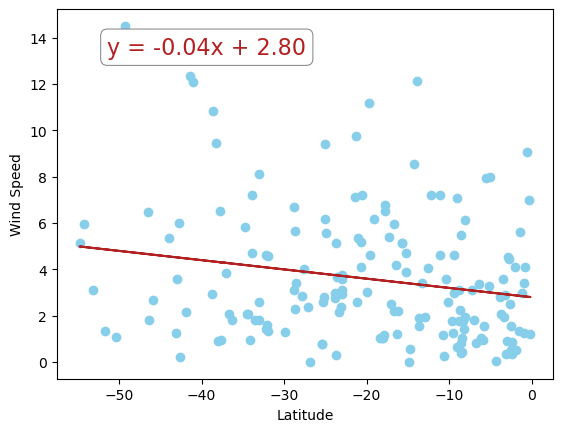

In [57]:
# Southern Hemisphere
# YOUR CODE HERE

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], plt.xlabel('Latitude'), plt.ylabel('Wind Speed'))

**Discussion about the linear relationship:** Regarding the correlation between wind speed and latitude, there is a very weak correlation in the Northern Hemisphere and a slightly less weak correlation in the Southern Hemisphere. Virtually no change in the Northern Hemisphere, and there is a slight decrease in windspeed the closer you get to the equator in the Southern Hemisphere.